In [1]:
import scipy.sparse as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse.linalg
import scipy.linalg

from time import process_time

##  Первое задание. Предобусловленный метод сопряженных градиентов.

Задача, решить линейную систему:
$$
Ax = b
$$

Где $A$ -  матрица оператора Лапласа, $b$ константный вектор.



$$
\begin{equation}
A =  \frac{1}{h^2}
\begin{pmatrix}
2 & -1 & \cdots & 0 &0 \\
-1 & 2 & \cdots & 0 & 0\\
\vdots  & \vdots  & \ddots & \vdots & \vdots \\
0 & 0& \cdots &-2 & 1 \\
0 & 0& \cdots &-1 & 1
\end{pmatrix}
\label{eq::Amat}
\end{equation}
$$

$h$ - Шаг сетки. Пусть сетка равномерная, тогда $h=\frac{1}{n+1}$, где $n+1$ - количество узлов в сетке. 


Задать такую матрицу и вектор можно следкющим образом 

In [2]:
#n можно взять любым больше 100. Перевести разрженную матрицу в плотную можно мотодом toarray()
np.random.seed(23)

n = 1000
A =  sp.diags([-1, 2, -1], [-1,0,1], shape = (n, n)) 
A =  A *(n+1)**2

#константный вектор правой части
b =  np.ones(n) * 6.




Число обусловленности такой матрицы будет большим

In [3]:
w, _= np.linalg.eig(A.toarray())
np.linalg.cond(A.toarray()), max(w)/min(w)

(406095.0426591573, 406095.042670628)

In [4]:
np.isclose(max(w)/min(w), np.linalg.cond(A.toarray()))

True

Проверить, как отработает метод сопряженных градиентов на такой задаче. (Метод можно взять из семинара)

Это просто алгоритм, который реализует метод сопряженных градиентов:

In [5]:
eps = 0.1

In [6]:
def ConjGradAlgo(A):

    start_time = process_time()
    x0 = np.zeros(n)  # initial approximation
    r0 = b - A @ x0
    if np.linalg.norm(r0, ord=2) < eps:
        return x0
    p0 = r0

    while (True):
        a = (np.transpose(r0) @ r0)/(np.transpose(p0) @ A @ p0)
        x1 = x0 + a*p0
        r1 = r0 - a*A @ p0
        if np.linalg.norm(r1, ord=2) < eps:
            print("Time elapsed for ConjGradAlgo: ", process_time() - start_time)
            return x1
        betta = (np.transpose(r1) @ r1)/(np.transpose(r0) @ r0)
        p1 = r1 + betta * p0

        p0 = p1
        r0 = r1
        x0 = x1

In [7]:
ConjGradAlgo(A)

Time elapsed for ConjGradAlgo:  0.9858923780000026


array([0.00299401, 0.00598203, 0.00896406, 0.01194011, 0.01491016,
       0.01787423, 0.02083231, 0.02378441, 0.02673051, 0.02967063,
       0.03260476, 0.0355329 , 0.03845505, 0.04137122, 0.04428139,
       0.04718558, 0.05008378, 0.052976  , 0.05586222, 0.05874246,
       0.0616167 , 0.06448497, 0.06734724, 0.07020352, 0.07305382,
       0.07589813, 0.07873645, 0.08156878, 0.08439513, 0.08721548,
       0.09002985, 0.09283823, 0.09564062, 0.09843703, 0.10122744,
       0.10401187, 0.10679031, 0.10956276, 0.11232923, 0.11508971,
       0.11784419, 0.12059269, 0.12333521, 0.12607173, 0.12880227,
       0.13152681, 0.13424538, 0.13695795, 0.13966453, 0.14236513,
       0.14505974, 0.14774836, 0.15043099, 0.15310763, 0.15577829,
       0.15844296, 0.16110164, 0.16375433, 0.16640103, 0.16904175,
       0.17167648, 0.17430522, 0.17692797, 0.17954473, 0.18215551,
       0.18476029, 0.18735909, 0.18995191, 0.19253873, 0.19511957,
       0.19769441, 0.20026327, 0.20282614, 0.20538303, 0.20793

Сейчас данный метод работает на черной магии, поэтому он опережает все наши алгоритмы с предобуславливателями, поэтому мы должны сравнять их шансы.

In [8]:
ConjGradAlgo(A.toarray())

Time elapsed for ConjGradAlgo:  19.590752271999996


array([0.00299401, 0.00598203, 0.00896406, 0.01194011, 0.01491016,
       0.01787423, 0.02083231, 0.02378441, 0.02673051, 0.02967063,
       0.03260476, 0.0355329 , 0.03845505, 0.04137122, 0.04428139,
       0.04718558, 0.05008378, 0.052976  , 0.05586222, 0.05874246,
       0.0616167 , 0.06448497, 0.06734724, 0.07020352, 0.07305382,
       0.07589813, 0.07873645, 0.08156878, 0.08439513, 0.08721548,
       0.09002985, 0.09283823, 0.09564062, 0.09843703, 0.10122744,
       0.10401187, 0.10679031, 0.10956276, 0.11232923, 0.11508971,
       0.11784419, 0.12059269, 0.12333521, 0.12607173, 0.12880227,
       0.13152681, 0.13424538, 0.13695795, 0.13966453, 0.14236513,
       0.14505974, 0.14774836, 0.15043099, 0.15310763, 0.15577829,
       0.15844296, 0.16110164, 0.16375433, 0.16640103, 0.16904175,
       0.17167648, 0.17430522, 0.17692797, 0.17954473, 0.18215551,
       0.18476029, 0.18735909, 0.18995191, 0.19253873, 0.19511957,
       0.19769441, 0.20026327, 0.20282614, 0.20538303, 0.20793

Написать метод сопряженных градиентов, учитывая действие предобуславлевателя. 


![](PCG.png)

([Полный текст тут](http://www.cse.psu.edu/~b58/cse456/lecture20.pdf))

Написать метод сопряженных градиентов, учитывая действие предобуславлевателя. 

In [9]:
def PrecConjGradAlgo(M):
    start_time = process_time()
    x0 = np.zeros(n) # initial approximation
    r0 = b - A @ x0
    z0 = M @ r0
    p0 = z0
    while(True):
        alpha = (np.transpose(r0) @ z0) / (np.transpose(p0) @ A @ p0)
        x1 = x0 + alpha * p0
        r1 = r0 - alpha * A @ p0
        # print(x1)
        if np.linalg.norm(r1, ord=2) < eps:
            print("Time elapsed for PrecConjGradAlgo: ", process_time() - start_time)
            return x1
        z1 = M @ r1
        betta = (np.transpose(r1) @ z1) / (np.transpose(r0) @ z0)
        p1 = z1 + betta * p0

        r0 = r1
        p0 = p1
        z0 = z1
        x0 = x1

Проверить работу метода на предобуславлевателе Гаусса-Зейделя. Обратите внимание, что есть симметричный и не симметричные варианты. Какой надо взять?([Статья с предобуславлевателями для метода сопряжённых градиентов](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.592.1575&rep=rep1&type=pdf))

Запустим наш алгоритм на разных предобуславливателях, и для чистоты эксперемента, отключим "черную магию"

Предобуславливотель Якоби:

In [10]:
D = np.diag(A.toarray())
D = sp.diags(D)

In [11]:
PrecConjGradAlgo(D.toarray())

Time elapsed for PrecConjGradAlgo:  3.0489977109999984


array([0.00299401, 0.00598203, 0.00896406, 0.01194011, 0.01491016,
       0.01787423, 0.02083231, 0.02378441, 0.02673051, 0.02967063,
       0.03260476, 0.0355329 , 0.03845505, 0.04137122, 0.04428139,
       0.04718558, 0.05008378, 0.052976  , 0.05586222, 0.05874246,
       0.0616167 , 0.06448497, 0.06734724, 0.07020352, 0.07305382,
       0.07589813, 0.07873645, 0.08156878, 0.08439513, 0.08721548,
       0.09002985, 0.09283823, 0.09564062, 0.09843703, 0.10122744,
       0.10401187, 0.10679031, 0.10956276, 0.11232923, 0.11508971,
       0.11784419, 0.12059269, 0.12333521, 0.12607173, 0.12880227,
       0.13152681, 0.13424538, 0.13695795, 0.13966453, 0.14236513,
       0.14505974, 0.14774836, 0.15043099, 0.15310763, 0.15577829,
       0.15844296, 0.16110164, 0.16375433, 0.16640103, 0.16904175,
       0.17167648, 0.17430522, 0.17692797, 0.17954473, 0.18215551,
       0.18476029, 0.18735909, 0.18995191, 0.19253873, 0.19511957,
       0.19769441, 0.20026327, 0.20282614, 0.20538303, 0.20793

Несиммитричный предобуславлеватель Гаусса-Зейделя:

In [12]:
L = np.linalg.cholesky(A.toarray())

In [13]:
PrecConjGradAlgo(D.toarray() + L)

Time elapsed for PrecConjGradAlgo:  2.4371345140000074


array([0.002994  , 0.00598201, 0.00896403, 0.01194007, 0.01491012,
       0.01787418, 0.02083225, 0.02378433, 0.02673043, 0.02967053,
       0.03260465, 0.03553278, 0.03845493, 0.04137108, 0.04428125,
       0.04718543, 0.05008362, 0.05297582, 0.05586204, 0.05874226,
       0.0616165 , 0.06448475, 0.06734702, 0.07020329, 0.07305358,
       0.07589788, 0.07873619, 0.08156851, 0.08439485, 0.0872152 ,
       0.09002955, 0.09283793, 0.09564031, 0.0984367 , 0.10122711,
       0.10401153, 0.10678996, 0.1095624 , 0.11232886, 0.11508933,
       0.11784381, 0.1205923 , 0.1233348 , 0.12607132, 0.12880184,
       0.13152638, 0.13424493, 0.1369575 , 0.13966407, 0.14236466,
       0.14505926, 0.14774787, 0.15043049, 0.15310713, 0.15577778,
       0.15844243, 0.16110111, 0.16375379, 0.16640048, 0.16904119,
       0.17167591, 0.17430464, 0.17692739, 0.17954414, 0.18215491,
       0.18475969, 0.18735848, 0.18995128, 0.1925381 , 0.19511893,
       0.19769377, 0.20026262, 0.20282548, 0.20538236, 0.20793

Симмитричный предобуславлеватель Гаусса-Зейделя:

In [14]:
U = scipy.linalg.cholesky(A.toarray())
M = (D.toarray() + L) @ scipy.sparse.linalg.inv(D) @ (D.toarray() + U)

PrecConjGradAlgo(M)

/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


Time elapsed for PrecConjGradAlgo:  2.2875618270000047


array([0.00299401, 0.00598203, 0.00896407, 0.01194011, 0.01491017,
       0.01787424, 0.02083232, 0.02378441, 0.02673052, 0.02967064,
       0.03260477, 0.03553291, 0.03845506, 0.04137123, 0.04428141,
       0.0471856 , 0.0500838 , 0.05297601, 0.05586224, 0.05874247,
       0.06161672, 0.06448498, 0.06734726, 0.07020354, 0.07305384,
       0.07589815, 0.07873647, 0.0815688 , 0.08439515, 0.08721551,
       0.09002988, 0.09283826, 0.09564065, 0.09843706, 0.10122747,
       0.1040119 , 0.10679034, 0.1095628 , 0.11232926, 0.11508974,
       0.11784423, 0.12059273, 0.12333524, 0.12607177, 0.12880231,
       0.13152685, 0.13424542, 0.13695799, 0.13966457, 0.14236517,
       0.14505978, 0.1477484 , 0.15043103, 0.15310768, 0.15577833,
       0.158443  , 0.16110168, 0.16375438, 0.16640108, 0.1690418 ,
       0.17167653, 0.17430527, 0.17692802, 0.17954479, 0.18215556,
       0.18476035, 0.18735915, 0.18995196, 0.19253879, 0.19511963,
       0.19769447, 0.20026333, 0.20282621, 0.20538309, 0.20793

Как видно из замеров времени, симметричный предобуславливатель показал себя чуть лучше, что неудивительно, так как наша матрица $A$ - положительно определенная симмитрическая, и для таких матриц симмитричный обуславливатель показывает себя лучше.

Только вот не совсем ясно, почему не использовать предобуславливатель равный $M = A$. Тогда же наше число обусловленности будет равно единице, и алгоритм сойдется за одну итерацию! Всего то нужно посчитать обратную... (Тем более у разряженной)

In [15]:
M = scipy.sparse.linalg.inv(A)
PrecConjGradAlgo(M)

Time elapsed for PrecConjGradAlgo:  0.0013010659999963536


array([0.00299401, 0.00598203, 0.00896406, 0.01194011, 0.01491016,
       0.01787423, 0.02083231, 0.02378441, 0.02673051, 0.02967063,
       0.03260476, 0.0355329 , 0.03845505, 0.04137122, 0.04428139,
       0.04718558, 0.05008378, 0.052976  , 0.05586222, 0.05874246,
       0.0616167 , 0.06448497, 0.06734724, 0.07020352, 0.07305382,
       0.07589813, 0.07873645, 0.08156878, 0.08439513, 0.08721548,
       0.09002985, 0.09283823, 0.09564062, 0.09843703, 0.10122744,
       0.10401187, 0.10679031, 0.10956276, 0.11232923, 0.11508971,
       0.11784419, 0.12059269, 0.12333521, 0.12607173, 0.12880227,
       0.13152681, 0.13424538, 0.13695795, 0.13966453, 0.14236513,
       0.14505974, 0.14774836, 0.15043099, 0.15310763, 0.15577829,
       0.15844296, 0.16110164, 0.16375433, 0.16640103, 0.16904175,
       0.17167648, 0.17430522, 0.17692797, 0.17954473, 0.18215551,
       0.18476029, 0.18735909, 0.18995191, 0.19253873, 0.19511957,
       0.19769441, 0.20026327, 0.20282614, 0.20538303, 0.20793

Используя "черную магию" (библиотеки для работы с разряженными матрицами), мы получаем просто феноменальный результат!

Теперь попробуем запустить без учета, что $A$ - разряженная:

In [16]:
M = scipy.linalg.inv(A.toarray())
PrecConjGradAlgo(M)

Time elapsed for PrecConjGradAlgo:  0.1389181750000006


array([0.00299401, 0.00598203, 0.00896406, 0.01194011, 0.01491016,
       0.01787423, 0.02083231, 0.02378441, 0.02673051, 0.02967063,
       0.03260476, 0.0355329 , 0.03845505, 0.04137122, 0.04428139,
       0.04718558, 0.05008378, 0.052976  , 0.05586222, 0.05874246,
       0.0616167 , 0.06448497, 0.06734724, 0.07020352, 0.07305382,
       0.07589813, 0.07873645, 0.08156878, 0.08439513, 0.08721548,
       0.09002985, 0.09283823, 0.09564062, 0.09843703, 0.10122744,
       0.10401187, 0.10679031, 0.10956276, 0.11232923, 0.11508971,
       0.11784419, 0.12059269, 0.12333521, 0.12607173, 0.12880227,
       0.13152681, 0.13424538, 0.13695795, 0.13966453, 0.14236513,
       0.14505974, 0.14774836, 0.15043099, 0.15310763, 0.15577829,
       0.15844296, 0.16110164, 0.16375433, 0.16640103, 0.16904175,
       0.17167648, 0.17430522, 0.17692797, 0.17954473, 0.18215551,
       0.18476029, 0.18735909, 0.18995191, 0.19253873, 0.19511957,
       0.19769441, 0.20026327, 0.20282614, 0.20538303, 0.20793

Получаем результат похуже, но все равно отличный!

Сравните результат работы предобусловленной и непредобусловленной версии

## Второе задание. Метод момента

Реализовать Метод момента.

![](Momentum.png)

([Картинка отсюда](https://cs231n.github.io/neural-networks-3/))

Сравнить его с методом Нестерова и методом градиентного спуска, которые были преддставлены на семинаре. Сравнивать можно на $2D$  задаче с семинара

In [2]:
sns.set()
np.random.seed(23)
n=100
# строим и нормализуем матрицу
A = np.array([[4,3], [3,4]])
U = np.random.rand(2, 2)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5

n_points = 100

u = np.linspace(-4, 4, n_points)
x, y = np.meshgrid(u, u)
b = np.random.rand(2)
X = np.vstack([x.flatten(), y.flatten()])

# строим изолинии
f_x = X.T @ A @ X - b @ X

f_x = np.diag(f_x).reshape(n_points, n_points)


# b I used  in my own experiments array([0.22104536, 0.68622209]) 

# начальное приближение
x0 = np.array([-4. , -4.])


# вспомогательные функции для кастомного Gradient DEscent
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b

In [3]:
import types
def backtracking (x, f, grad_f, rho, alpha0, beta1, beta2):
    
    alpha = alpha0
    if isinstance(grad_f ,types.FunctionType):
        phi1 = f(x) -  beta1 * alpha * grad_f(x).dot(grad_f(x))
        phi2 = f(x) -  beta2 * alpha * grad_f(x).dot(grad_f(x))    
        f_k = f(x - alpha * grad_f(x)) 
    else:
        phi1 = f(x) -  beta1 * alpha * grad_f @ grad_f
        phi2 = f(x) -  beta2 * alpha * grad_f @ grad_f  
        f_k = f(x - alpha * grad_f) 

    while not ((f_k <=phi1) and 
              (f_k >=phi2)):
        alpha *= rho
        
        if isinstance(grad_f ,types.FunctionType):
            phi1 = f(x) -  beta1 * alpha * grad_f(x).dot(grad_f(x))
            phi2 = f(x) -  beta2 * alpha * grad_f(x).dot(grad_f(x))    
            f_k = f(x - alpha * grad_f(x)) 
        else: 
            phi1 = f(x) -  beta1 * alpha * grad_f @ grad_f
            phi2 = f(x) -  beta2 * alpha * grad_f @ grad_f  
            f_k = f(x - alpha * grad_f) 
        if alpha < 1e-17:

            return alpha / rho

    return alpha

#Callback и в  GD и в CG написан по убогому, поэтому этот костыль для рисования графика
def  get_x_y_from_callback(array, x0):
    x_array = [x0[0]]
    y_array = [x0[0]]
    for el in array:
        x_array.append(el[0])
        y_array.append(el[1])
        
    return np.array(x_array), np.array(y_array)

In [4]:
def NesterovAcceleratedGD(f, gradf, x0, momentum =0.9, max_iter=1000, tol=1e-8,  rho=0.5, beta1=0.2):
    x = x0.copy()
    iteration = 0
    conv_array = []

    change = np.zeros(x.shape)
   
    while True:

        beta2 = 1. -beta1

        proj = x + momentum * change
        
        gradient = gradf(proj)
        alpha = backtracking (x, f, gradf, rho=rho, alpha0=1., beta1=beta1, beta2=beta2)
        change = momentum * change - alpha * gradient
        x = x  + change

        iteration += 1
        if np.linalg.norm(gradf(x)) < tol:
            break
        if iteration >= max_iter:
            break
        conv_array.append(x)
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x)),  "conv_array": conv_array}
    return res


In [132]:
mu = 0.3 #hyperparam

In [133]:
def MomentumGradientDescent(f, gradf, x0, max_iter=1000, tol=1e-8,  rho=0.7, beta1=0.3):
    x = x0.copy()
    iteration = 0
    conv_array = []
    v = np.zeros(x.shape)
  
    while True:

        beta2 = 1. -beta1

        alpha = backtracking (x, f, gradf, rho=rho, alpha0=1., beta1=beta1, beta2=beta2)
        gradient = gradf(x)
        v = mu * v - alpha * gradient # integrate velocity
        x += v
        iteration += 1
        if np.linalg.norm(gradf(x)) < tol:
            break
        if iteration >= max_iter:
            break
        conv_array.append(x.copy())
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x)),  "conv_array": conv_array}
#     print(res)
    return res

In [134]:
def GradientDescent(f, gradf, x0, max_iter=1000, tol=1e-8,  rho=0.7, beta1=0.3):
    x = x0.copy()
    iteration = 0
    conv_array = []

  
    while True:

        beta2 = 1. -beta1

        alpha = backtracking (x, f, gradf, rho=rho, alpha0=1., beta1=beta1, beta2=beta2)
        gradient = gradf(x)
        x = x - alpha * gradient
        iteration += 1
        if np.linalg.norm(gradf(x)) < tol:
            break
        if iteration >= max_iter:
            break
        conv_array.append(x)
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x)),  "conv_array": conv_array}
    return res

In [135]:
res_mom = MomentumGradientDescent(f, grad_f, x0, rho=0.5, beta1=0.2)
x_md, y_md = get_x_y_from_callback(res_mom["conv_array"], x0)

In [136]:
res_nest = NesterovAcceleratedGD(f, grad_f, x0, )
x_na, y_na = get_x_y_from_callback(res_nest["conv_array"], x0)

In [137]:
res = GradientDescent(f, grad_f, x0, rho=0.5, beta1=0.2)
x_gd, y_gd = get_x_y_from_callback(res['conv_array'], x0)

In [138]:
len(res["conv_array"]), len(res_nest["conv_array"]), len(res_mom["conv_array"])

(69, 84, 37)

Как можно увидеть, метод моментов сходится за меньшее количество итераций, при грамотном подборе гиперпараметра $mu$

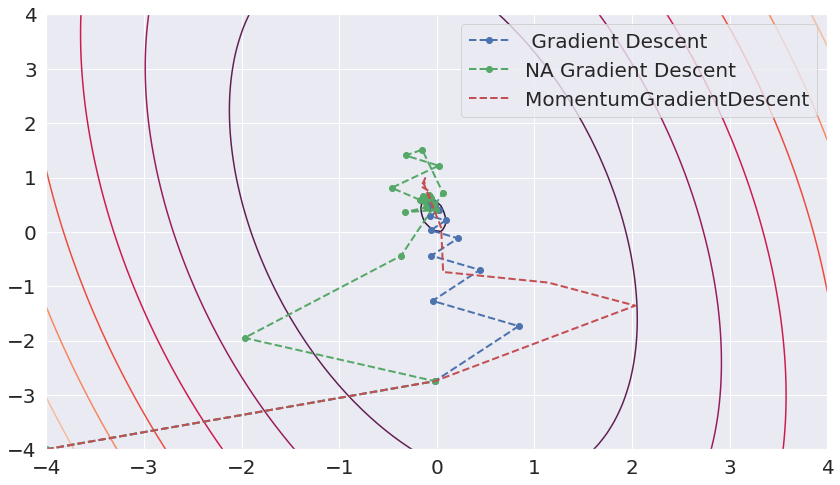

In [139]:
import seaborn as sns
sns.set()

plt.figure(figsize = (14, 8))
plt.plot(x_gd, y_gd, '--bo',linewidth=2, label=' Gradient Descent')
plt.plot(x_na, y_na ,'--go', linewidth=2, label='NA Gradient Descent')
plt.plot(x_md, y_md ,'--', color = 'r', linewidth=2, label='MomentumGradientDescent')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x)

Как можно заметить, если параметр подобран плохо, то тогда метод сходиться будет долго

In [141]:
mu = 0.95

In [142]:
res_mom = MomentumGradientDescent(f, grad_f, x0, rho=0.5, beta1=0.2)
x_md, y_md = get_x_y_from_callback(res_mom["conv_array"], x0)

In [143]:
len(res_mom["conv_array"])

999

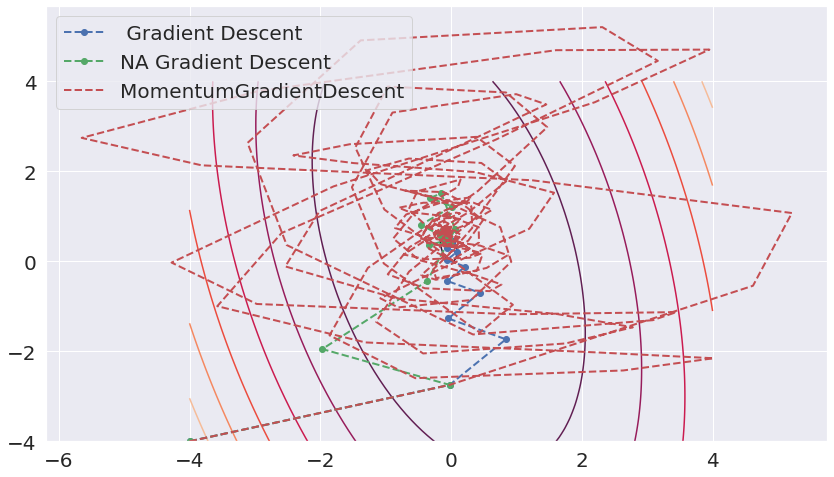

In [144]:
import seaborn as sns
sns.set()

plt.figure(figsize = (14, 8))
plt.plot(x_gd, y_gd, '--bo',linewidth=2, label=' Gradient Descent')
plt.plot(x_na, y_na ,'--go', linewidth=2, label='NA Gradient Descent')
plt.plot(x_md, y_md ,'--', color = 'r', linewidth=2, label='MomentumGradientDescent')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x)